In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
df = pd.read_csv('data.csv')

1. Check for missing data
2. Describe data and check shape
3. Visualiza data
4. Correlation matrix
5. Split into train and test

No need for feature scaling because all of the features have the same range [1, 10]

In [5]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shap,Marginal Adhesion,Single Epithelial Cell,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
df.shape

(699, 11)

In [8]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

No missing values :)

In [6]:
df.isnull().any()

Sample code number         False
Clump Thickness            False
Uniformity of Cell Size    False
Uniformity of Cell Shap    False
Marginal Adhesion          False
Single Epithelial Cell     False
Bare Nuclei                False
Bland Chromatin            False
Normal Nucleoli            False
Mitoses                    False
Class                      False
dtype: bool

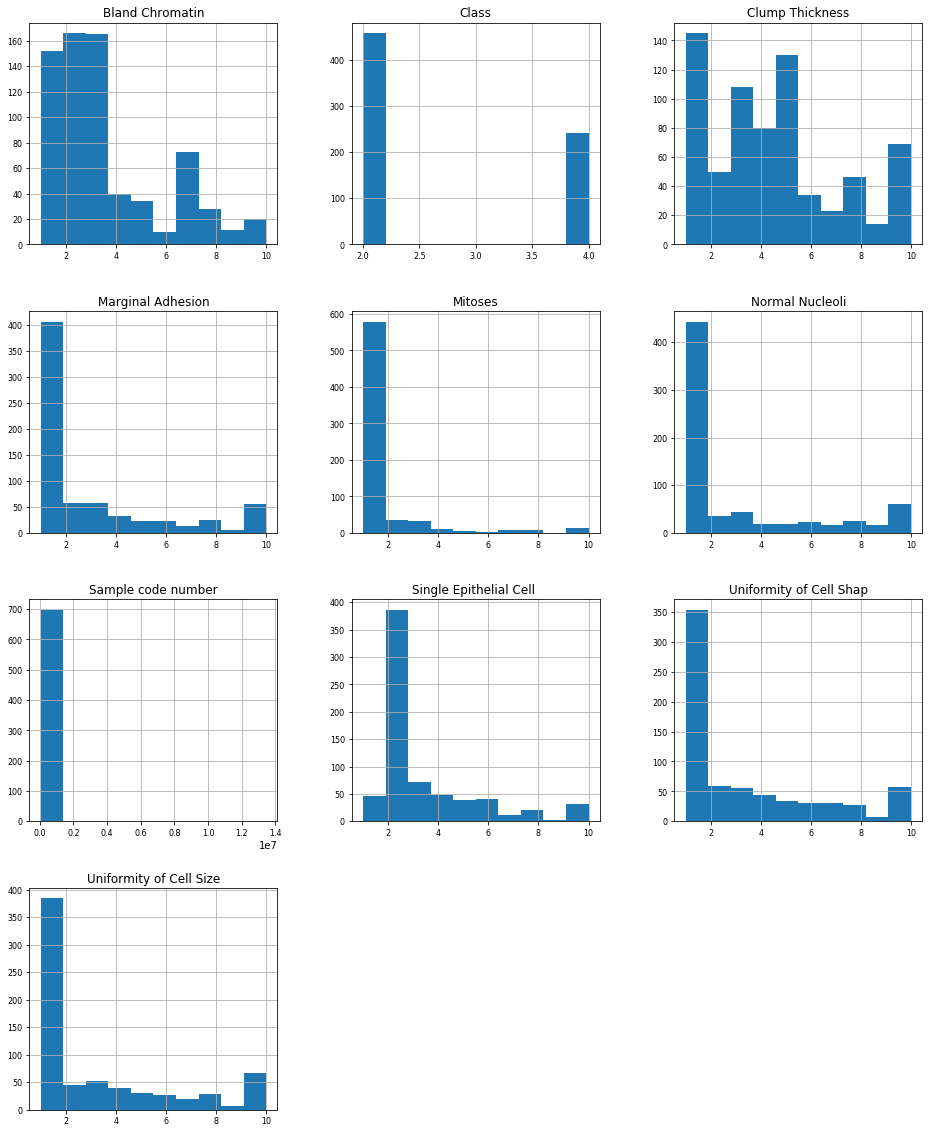

In [14]:
df.hist(figsize=(16,20), xlabelsize=8, ylabelsize=8);

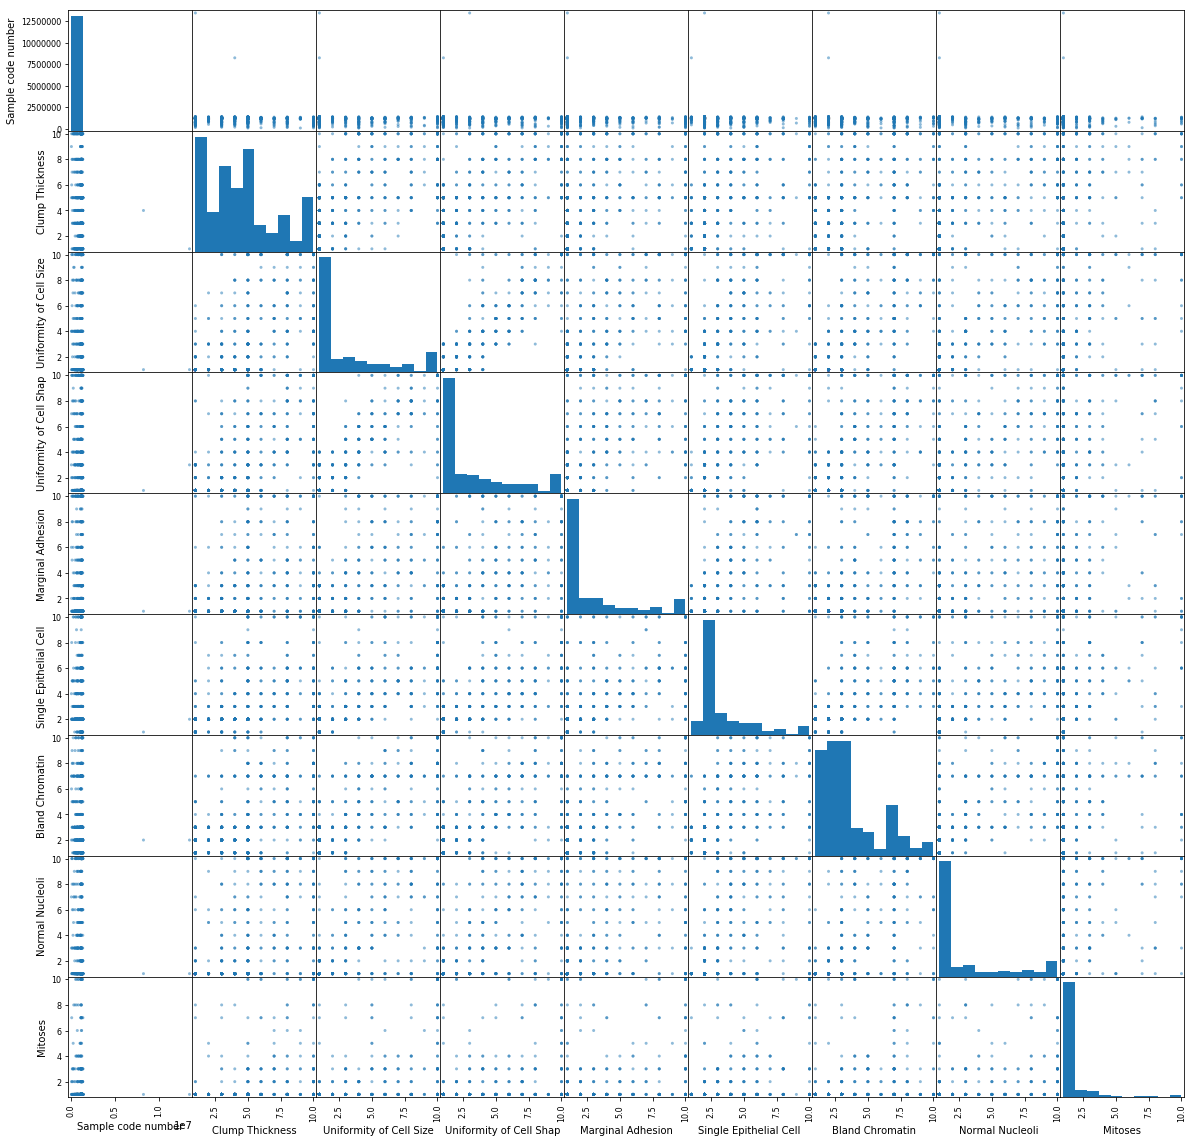

In [23]:
scatter_matrix(df.drop('Class',1), figsize=(20,20));

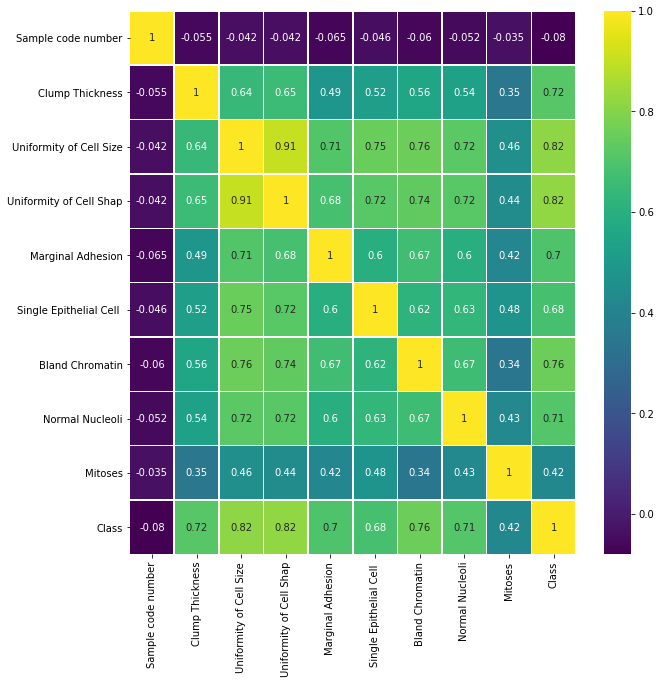

In [30]:
corr_mat = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_mat, cmap='viridis', annot=True, linewidths=0.5);

In [31]:
# REMOVE sample code number=> low correlation with the other features, sugesting that has no real value

df = df.drop('Sample code number', 1)

In [32]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shap,Marginal Adhesion,Single Epithelial Cell,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


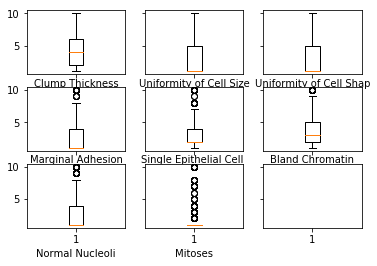

In [48]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)

plots = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

i = 0
for col in df.drop('Class', 1).columns:
    if col == 'Bare Nuclei':
        continue
    plots[i].boxplot(df[col])
    plots[i].set_xlabel(col);
    i+=1


Mitoses seems that it has outliers. Maybe it is just beacuse it has a lot of rows with value 1

In [50]:
df['Mitoses'].value_counts()

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

In [52]:
df['Normal Nucleoli'].value_counts()

1     443
10     61
3      44
2      36
8      24
6      22
5      19
4      18
9      16
7      16
Name: Normal Nucleoli, dtype: int64

In [2]:
from sklearn.model_selection import train_test_split
X = df.drop('Class', 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [4]:
X_train_df.to_csv('x_train.csv',index=False)
X_test_df.to_csv('x_test.csv',index=False)
y_train_df.to_csv('y_train.csv',index=False)
y_test_df.to_csv('y_test.csv',index=False)